Alright. Let's do some exploratory data analysis. I got some files from https://www.epa.gov/outdoor-air-quality-data/download-daily-data because I had this observation that days after bad air quality are cooler than predicted. It keeps telling me that it'll be 89 degrees, say, so I figure I'll take the kid to the pool, but instead it's 81 so instead we refurbish furniture (or whatever). Yes, we'll go to the pool :)

July 19 downloads of data for the Minneapolis-St Paul-Bloomington CBSA.

Ugh setting up a new python environment is such a pain. Many expletives. Why is this notebook running 3.11.4 when I have activated the 3.11.1 virtual environment, even though ti looks for requirements from this notebook in the 3.11.1 path? Why does it not find pandas when I installed that already? Why does RStudio just work, while Python on an M1 is such a mess? And should I just start running Docker containers for everything?

In [14]:
#!pip3 install pandas
#!pip3 install seaborn

In [20]:
!pip install seaborn

In [22]:
%pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 3.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 16.9 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 20.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.3/229.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 17.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 20.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.3/502.3 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 9.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [45]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [46]:
import numpy as np
import seaborn as sns
import pandas as pd
import sys
import matplotlib.pyplot as plt


In [28]:
pwd

'/Users/kaisataipale/Documents/AQI-explore'

In [30]:
aqi_2023 = pd.read_csv("ad_viz_plotval_data.csv")
aqi_2022 = pd.read_csv("ad_viz_plotval_data-2.csv")
aqi_2021 = pd.read_csv("ad_viz_plotval_data-3.csv")

In [11]:
sys.version

'3.11.4 (main, Jun 20 2023, 17:37:48) [Clang 14.0.0 (clang-1400.0.29.202)]'

In [31]:
aqi_2021.head()

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/01/2021,AQS,270031002,1,18.0,ug/m3 LC,63,Anoka County Airport,1,100.0,88101,PM2.5 - Local Conditions,33460,"Minneapolis-St. Paul-Bloomington, MN-WI",27,Minnesota,3,Anoka,45.13768,-93.207615
1,01/07/2021,AQS,270031002,1,24.9,ug/m3 LC,78,Anoka County Airport,1,100.0,88101,PM2.5 - Local Conditions,33460,"Minneapolis-St. Paul-Bloomington, MN-WI",27,Minnesota,3,Anoka,45.13768,-93.207615
2,01/10/2021,AQS,270031002,1,16.4,ug/m3 LC,60,Anoka County Airport,1,100.0,88101,PM2.5 - Local Conditions,33460,"Minneapolis-St. Paul-Bloomington, MN-WI",27,Minnesota,3,Anoka,45.13768,-93.207615
3,01/11/2021,AQS,270031002,1,7.3,ug/m3 LC,30,Anoka County Airport,1,100.0,88101,PM2.5 - Local Conditions,33460,"Minneapolis-St. Paul-Bloomington, MN-WI",27,Minnesota,3,Anoka,45.13768,-93.207615
4,01/13/2021,AQS,270031002,1,14.9,ug/m3 LC,57,Anoka County Airport,1,100.0,88101,PM2.5 - Local Conditions,33460,"Minneapolis-St. Paul-Bloomington, MN-WI",27,Minnesota,3,Anoka,45.13768,-93.207615


In [81]:
aqi_2021['Site Name'].unique()

array(['Anoka County Airport', 'Apple Valley', 'Near Road I-35',
       'Near Road I-35/I-94', 'Andersen School',
       'St. Louis Park City Hall', 'Ramsey Health Center',
       'Harding High School', 'B.F. Pearson School',
       'St. Michael Elementary School'], dtype=object)

Some data description. I have "Site ID" and "Site Name" telling me the location id and name. I have Date giving dates, with gaps (not every day is measured). I have the AQI score (DAILY_AQI_VALUE) and "Daily Mean PM2.5 Concentration". I don't know what PERCENT_COMPLETE is. I have CBSA_CODE, which should all be the same here. I have SITE_LATITUDE and SITE_LONGITUDE which will be helpful for mapping.

I'd like to concatenate all these files and look at some plots of AQI over the three years I have. (I'll explore with that smaller set and then download more and rerun if I like how things are going.)

<Axes: xlabel='Date', ylabel='DAILY_AQI_VALUE'>

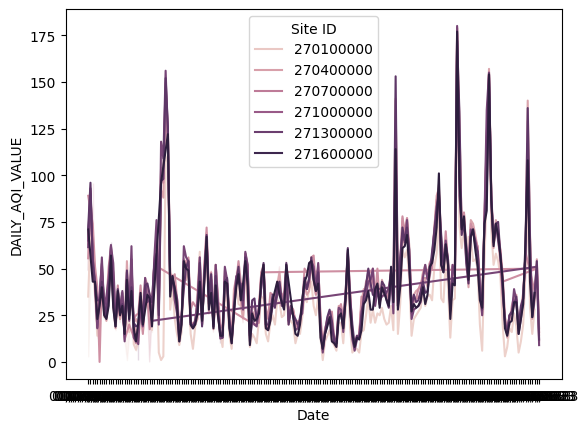

In [33]:
# quick plot for 2023
sns.lineplot(x="Date", y="DAILY_AQI_VALUE",
             hue="Site ID",# style="event",
             data=aqi_2023)

<Axes: xlabel='Date', ylabel='DAILY_AQI_VALUE'>

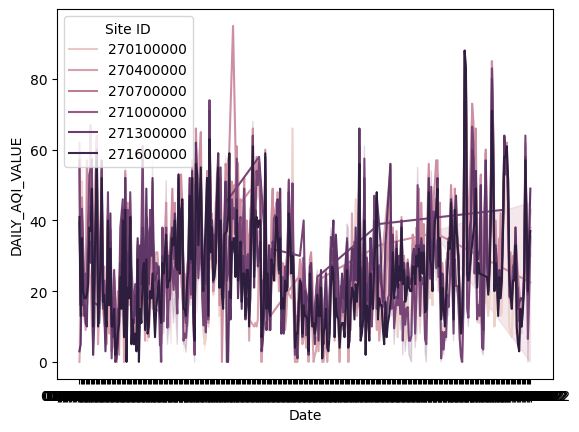

In [35]:
sns.lineplot(x="Date", y="DAILY_AQI_VALUE",
             hue="Site ID",# style="event",
             data=aqi_2022)

<Axes: xlabel='Date', ylabel='DAILY_AQI_VALUE'>

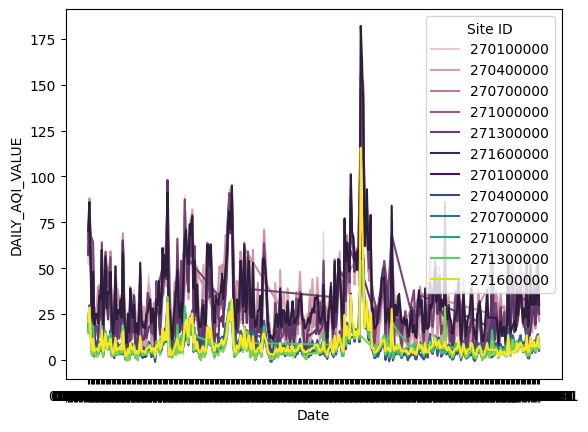

In [51]:
# quick plot for 2021
sns.lineplot(x="Date", y="DAILY_AQI_VALUE",
             hue="Site ID",# style="event",
             data=aqi_2021)
sns.lineplot(x="Date", y="Daily Mean PM2.5 Concentration",
             hue="Site ID",palette = "viridis",
             data=aqi_2021)

In [37]:
aqi_df = pd.concat([aqi_2023,aqi_2022])
aqi_df = pd.concat([aqi_df, aqi_2021])

In [38]:
aqi_df.columns.values

array(['Date', 'Source', 'Site ID', 'POC',
       'Daily Mean PM2.5 Concentration', 'UNITS', 'DAILY_AQI_VALUE',
       'Site Name', 'DAILY_OBS_COUNT', 'PERCENT_COMPLETE',
       'AQS_PARAMETER_CODE', 'AQS_PARAMETER_DESC', 'CBSA_CODE',
       'CBSA_NAME', 'STATE_CODE', 'STATE', 'COUNTY_CODE', 'COUNTY',
       'SITE_LATITUDE', 'SITE_LONGITUDE'], dtype=object)

In [39]:
# Let's ensure we have pandas date
aqi_df['Date_pd'] = pd.to_datetime(aqi_df['Date'])

In [41]:
aqi_df.head()

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,...,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE,Date_pd
0,01/06/2023,AQS,270031002,1,19.5,ug/m3 LC,67,Anoka County Airport,1,100.0,...,PM2.5 - Local Conditions,33460,"Minneapolis-St. Paul-Bloomington, MN-WI",27,Minnesota,3,Anoka,45.13768,-93.207615,2023-01-06
1,01/09/2023,AQS,270031002,1,31.8,ug/m3 LC,92,Anoka County Airport,1,100.0,...,PM2.5 - Local Conditions,33460,"Minneapolis-St. Paul-Bloomington, MN-WI",27,Minnesota,3,Anoka,45.13768,-93.207615,2023-01-09
2,01/12/2023,AQS,270031002,1,12.7,ug/m3 LC,52,Anoka County Airport,1,100.0,...,PM2.5 - Local Conditions,33460,"Minneapolis-St. Paul-Bloomington, MN-WI",27,Minnesota,3,Anoka,45.13768,-93.207615,2023-01-12
3,01/15/2023,AQS,270031002,1,9.3,ug/m3 LC,39,Anoka County Airport,1,100.0,...,PM2.5 - Local Conditions,33460,"Minneapolis-St. Paul-Bloomington, MN-WI",27,Minnesota,3,Anoka,45.13768,-93.207615,2023-01-15
4,01/18/2023,AQS,270031002,1,3.6,ug/m3 LC,15,Anoka County Airport,1,100.0,...,PM2.5 - Local Conditions,33460,"Minneapolis-St. Paul-Bloomington, MN-WI",27,Minnesota,3,Anoka,45.13768,-93.207615,2023-01-18


How do PM2.5 and AQI relate? Remember that AQI is made up of PM2.5, PM10, and ozone, at least.

Seaborn prefers a long format, blegh. Fair, yet...

<Axes: xlabel='Date', ylabel='Daily Mean PM2.5 Concentration'>

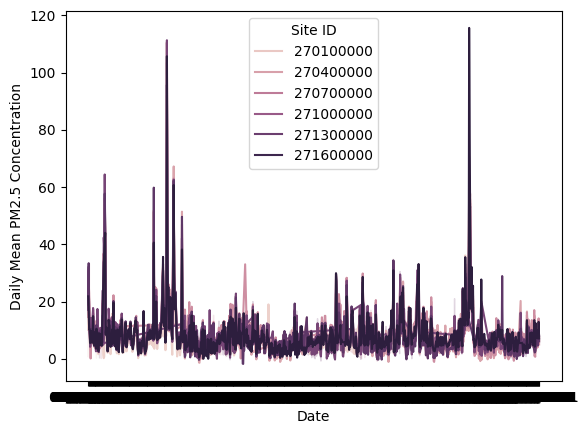

In [48]:
# Plot 2.5 alone
# quick plot for all years
sns.lineplot(x="Date", y="Daily Mean PM2.5 Concentration",
             hue="Site ID",
             data=aqi_df)
#mths = pd.date_range('2021-01-01', periods=12, freq='MS')


<Axes: xlabel='Date', ylabel='DAILY_AQI_VALUE'>

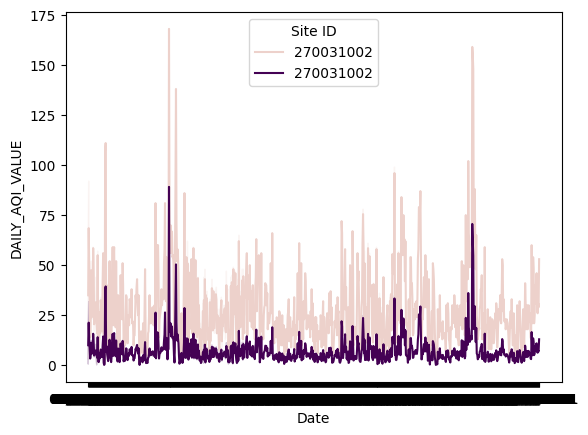

In [52]:

# quick plot for one site, pm2.5 vs aqi
sns.lineplot(x="Date", y="DAILY_AQI_VALUE",
             hue="Site ID",# style="event",
             data=aqi_df[aqi_df['Site ID'] == 270031002])
sns.lineplot(x="Date", y="Daily Mean PM2.5 Concentration",
             hue="Site ID",palette = "viridis",
             data=aqi_df[aqi_df['Site ID'] == 270031002])

Well, question #1 then: seems like pm2.5 isn't the primary contributor to AQI when linked with wildfire smoke in particular (I draw this conclusion from my eyeballs and lived experience of this summer). Is it PM10 that is produced, then, by wildfires? I should grab that. And how does ozone work in?

Dear diary, I am at a coffeeshop with delicious cortados. I've also done some reading about wildfires and particulate matter. Here is where I reveal I have dual interests: 1) I have my experience with cooler days (it's now going to be a high of 81 F today rather than the previously forecast 89, and so I'm trying to decide whether to take kid to pool today or tomorrow!) and 2) what is the effect of all this particulate matter on crop yields? 

The impact of fine particulate matter (PM2.5) on China's agricultural production from 2001 to 2010 -- need to get full text of this paper

Particulate matter in the cultivation area may contaminate leafy vegetables with heavy metals above safe levels in Korea -- not my primary concern per se, but an interesting effect given my nice new tomato plants

Combined impacts of climate and air pollution on human health and agricultural productivity -- this is open access, have it

Need to track down this Stanford research: https://news.stanford.edu/2022/06/01/pollution-and-crops/ A really interesting tidbit here: "Previous research by Lobell and Burney estimated reductions in ozone, particulate matter, nitrogen dioxide, and sulfur dioxide between 1999 and 2019 contributed to about 20% of the increase in U.S. corn and soybean yield gains during that period – an amount worth about $5 billion per year."

From a public health point of view, this is an interesting one -- "The mortality impact of fine particulate matter in China: Evidence from trade shocks"

The EPA has a bunch of info about pollution here; https://gispub.epa.gov/air/trendsreport/2022/#air_trends

A nice quick rundown on effects of various types of pollution on vegetation can be found here: https://www.ontario.ca/page/effects-air-pollution-agricultural-crops

I also got historical temp data from NOAA so that we can take a crack at the pool question.

Last, back to wildfires per se: https://csl.noaa.gov/factsheets/csdWildfiresFIREX.pdf here is the NOAA fact sheet on a wildfire and air quality project, with https://csl.noaa.gov/projects/firex-aq/ the site for the project. Go from there (this is starting point)

## Plan of action

I have the PM2.5 data. I can get the PM10 data. I can get the ozone data. First let's mash together some code for looking at how change in temp from daytime high to next daytime high correlates with PM2.5 or AQI of the previous day. Again, my philosophy is to get some code working and then bring in more data, iterating through the work.

(In a work context, this is because iterating quickly to initial visualizations etc allows the group to assess if the correct questions are being answered/if we have the right data/etc, allowing course correction early in the process before substantial investment.)

In [53]:
temp_data = pd.read_csv("3396352.csv")

In [54]:
temp_data.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,MDPR,PRCP,SNOW,...,TMIN,TOBS,WESD,WESF,WT01,WT03,WT04,WT05,WT06,WT11
0,US1MNRM0163,"SAINT PAUL 3.5 WSW, MN US",44.9336,-93.17248,285.9,2022-01-01,NaN,NaN,0.10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US1MNRM0163,"SAINT PAUL 3.5 WSW, MN US",44.9336,-93.17248,285.9,2022-01-02,NaN,NaN,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US1MNRM0163,"SAINT PAUL 3.5 WSW, MN US",44.9336,-93.17248,285.9,2022-01-03,NaN,NaN,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US1MNRM0163,"SAINT PAUL 3.5 WSW, MN US",44.9336,-93.17248,285.9,2022-01-04,NaN,NaN,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US1MNRM0163,"SAINT PAUL 3.5 WSW, MN US",44.9336,-93.17248,285.9,2022-01-05,NaN,NaN,0.12,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
temp_data.columns.values


array(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE',
       'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'TOBS',
       'WESD', 'WESF', 'WT01', 'WT03', 'WT04', 'WT05', 'WT06', 'WT11'],
      dtype=object)

I'm primarily interested in TMAX, then, from day to day. Let's just plot the data to scan for weirdness.

In [56]:
temp_data['DATE'] = pd.to_datetime(temp_data['DATE'])

<Axes: xlabel='DATE', ylabel='TMAX'>

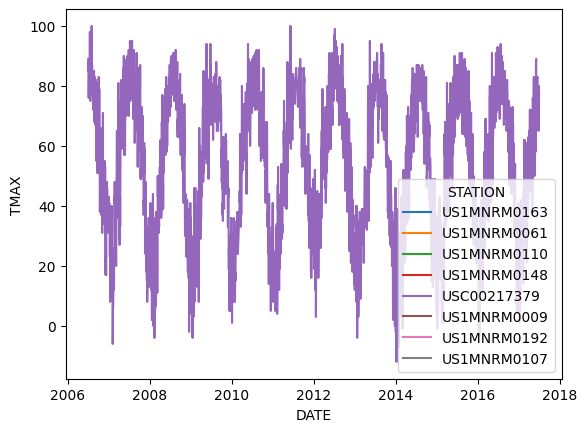

In [58]:
sns.lineplot(x="DATE", y="TMAX",
             hue="STATION",# style="event",
             data=temp_data)

In [59]:
temp_data.LATITUDE.unique()

array([44.9336   , 44.937442 , 44.932251 , 44.938313 , 44.9312   ,
       44.93     , 44.936    , 44.9361831])

Ok I'm worried. Where is 2023?? I really did pick dates thru 2023. Hmmm...



In [60]:
temp_data.tail()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,MDPR,PRCP,SNOW,...,TMIN,TOBS,WESD,WESF,WT01,WT03,WT04,WT05,WT06,WT11
8194,US1MNRM0107,"SAINT PAUL 3.8 WSW, MN US",44.936183,-93.180019,280.7,2023-07-09,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8195,US1MNRM0107,"SAINT PAUL 3.8 WSW, MN US",44.936183,-93.180019,280.7,2023-07-10,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8196,US1MNRM0107,"SAINT PAUL 3.8 WSW, MN US",44.936183,-93.180019,280.7,2023-07-11,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8197,US1MNRM0107,"SAINT PAUL 3.8 WSW, MN US",44.936183,-93.180019,280.7,2023-07-12,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8198,US1MNRM0107,"SAINT PAUL 3.8 WSW, MN US",44.936183,-93.180019,280.7,2023-07-13,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


yeah, there is 2023 data in there, let me check what's going on -- why is TMAX not there? 

In [63]:
temp_data[temp_data["STATION"] == "US1MNRM0107"].TMAX.tail()

8194   NaN
8195   NaN
8196   NaN
8197   NaN
8198   NaN
Name: TMAX, dtype: float64

In [66]:
temp_data[temp_data["DATE"]>"2023-01-01"]["TMAX"]

325    NaN
326    NaN
327    NaN
328    NaN
329    NaN
        ..
8194   NaN
8195   NaN
8196   NaN
8197   NaN
8198   NaN
Name: TMAX, Length: 573, dtype: float64

Oh yeah, my comments above on having appropriate data for the analysis are prescient, eh? Gotta find that TMAX data for somewhere around here.... Looks like NOAA has some, but the service is down so I can't request it yet. Git commit and come back to this...

B---, I'm back by, popular demand! (Guess where I was last night.) Found TMAX in Ramsey county weather station data.

In [67]:
ram_temp_df = pd.read_csv("3397798.csv")

In [68]:
ram_temp_df = ram_temp_df[~ram_temp_df['TMAX'].isna()]

In [71]:
ram_temp_df.shape

(5969, 10)

<Axes: xlabel='DATE', ylabel='TMAX'>

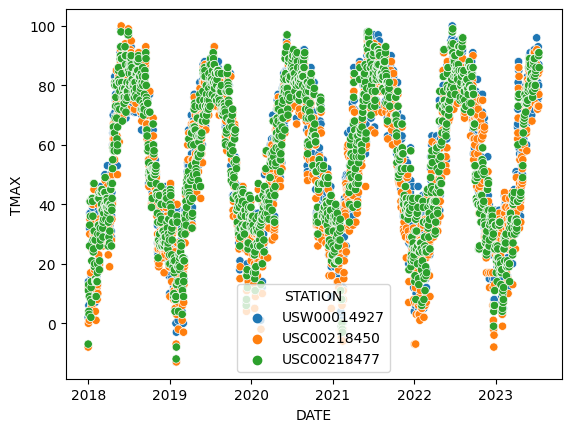

In [74]:
sns.scatterplot(x="DATE", y="TMAX",
             hue="STATION",# style="event",
             data=ram_temp_df)

Ooh, because of the geo diversity here we even get out of the urban heat island. Alright. We can dig into this all, but first the stupidest question -- how does $\Delta TMAX$ relate to AQI?

In [73]:
ram_temp_df['DATE']= pd.to_datetime(ram_temp_df['DATE'])

In [76]:
ram_temp_df.sort_values(by=['STATION', 'DATE'], inplace=True)

In [77]:
# group by station
grouped_df = ram_temp_df.groupby('STATION')

In [79]:
ram_temp_df['tmax_diff'] = grouped_df['TMAX'].diff()

In [80]:
ram_temp_df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,TAVG,TMAX,TMIN,TOBS,tmax_diff
16613,USC00218450,"UNIVERSITY OF MN ST. PAUL, MN US",44.9902,-93.17995,295.7,2018-01-01,NaN,-8.0,-18.0,NaN,NaN
16614,USC00218450,"UNIVERSITY OF MN ST. PAUL, MN US",44.9902,-93.17995,295.7,2018-01-02,NaN,0.0,-15.0,NaN,8.0
16615,USC00218450,"UNIVERSITY OF MN ST. PAUL, MN US",44.9902,-93.17995,295.7,2018-01-03,NaN,12.0,-11.0,-1.0,12.0
16616,USC00218450,"UNIVERSITY OF MN ST. PAUL, MN US",44.9902,-93.17995,295.7,2018-01-04,NaN,4.0,-8.0,-6.0,-8.0
16617,USC00218450,"UNIVERSITY OF MN ST. PAUL, MN US",44.9902,-93.17995,295.7,2018-01-05,NaN,4.0,-11.0,NaN,0.0


In [112]:
# I gotta do this for AQI as well
aqi_df.sort_values(by=['Site Name', 'Date_pd'], inplace=True)
# group by site
grouped_aqi_df = aqi_df.groupby('Site Name')
aqi_df['aqi_diff'] = grouped_aqi_df['DAILY_AQI_VALUE'].diff()
aqi_df['aqi_diff_shift']= grouped_aqi_df['DAILY_AQI_VALUE'].diff(-1)

In [113]:
ram_temp_df.NAME.unique()

array(['UNIVERSITY OF MN ST. PAUL, MN US', 'VADNAIS LAKE, MN US',
       'ST. PAUL DOWNTOWN AIRPORT, MN US'], dtype=object)

In [114]:
ram_temp_df[ram_temp_df.NAME == 'ST. PAUL DOWNTOWN AIRPORT, MN US'].STATION.unique()

array(['USW00014927'], dtype=object)

In [115]:
## Alright, let's plot. I'm going to pick downtown st paul and Harding High school, just to compare


temp_temp_df = ram_temp_df[ram_temp_df.STATION == 'USW00014927']
# 'Harding High School' for AQI
aqi_temp_df = aqi_df[aqi_df['Site Name'] == 'Harding High School']


I need to merge Date_pd with aqi_temp_df and DATE in temp_temp_df, then drop the NAs for the difference in temp, then plot



In [116]:
merged_temp_df = temp_temp_df.merge(aqi_temp_df, left_on = 'DATE', right_on = 'Date_pd', how = 'inner')

<Axes: xlabel='DAILY_AQI_VALUE', ylabel='tmax_diff'>

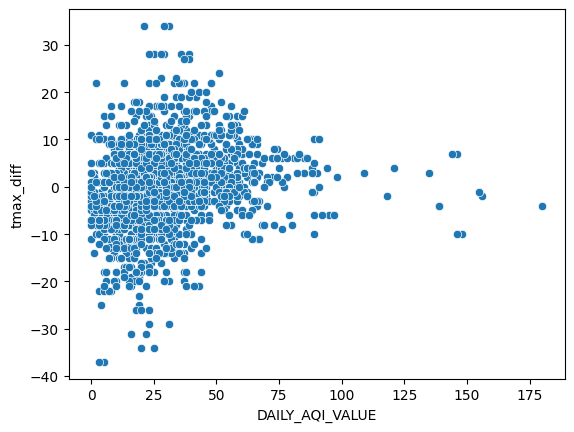

In [117]:
sns.scatterplot(data = merged_temp_df, x = 'DAILY_AQI_VALUE', y = 'tmax_diff')

<Axes: xlabel='aqi_diff', ylabel='tmax_diff'>

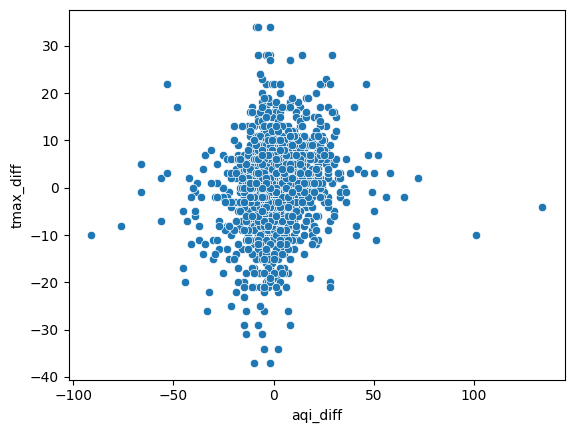

In [118]:
sns.scatterplot(data = merged_temp_df, x = 'aqi_diff', y = 'tmax_diff')

<Axes: xlabel='aqi_diff_shift', ylabel='tmax_diff'>

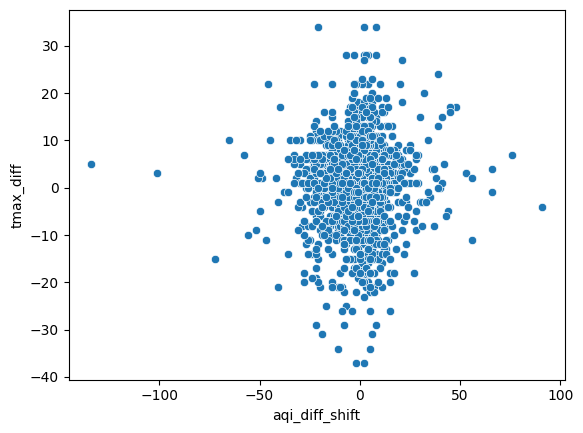

In [119]:
sns.scatterplot(data = merged_temp_df, x = 'aqi_diff_shift', y = 'tmax_diff')

Naively, this really supports the hypothesis. However, however, however! There is the underlying latent factor of seasonality. Wildfires are more likely in a period of summer rather than the shoulder season where big swings happen. How best to probe this? I really want to get to causality. A really easy method for sniff testing is just looking at July and August, because my original question was about going to the pool, but then let's go to a causal investigation.

In [120]:
merged_temp_df['MONTH'] = merged_temp_df['DATE'].dt.month

In [121]:
# Let's just take 6, 7, 8
summer = merged_temp_df['MONTH'].isin([6, 7, 8])

# Use the boolean condition to select the desired rows
summer_merged_df = merged_temp_df[summer]


<Axes: xlabel='DAILY_AQI_VALUE', ylabel='tmax_diff'>

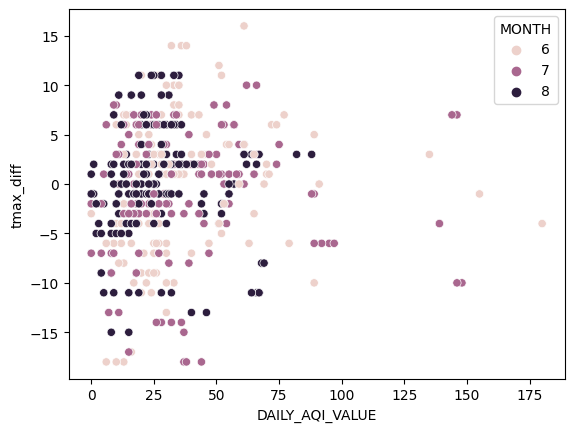

In [122]:
sns.scatterplot(data = summer_merged_df, x = 'DAILY_AQI_VALUE', y = 'tmax_diff', hue = 'MONTH')

<Axes: xlabel='aqi_diff_shift', ylabel='tmax_diff'>

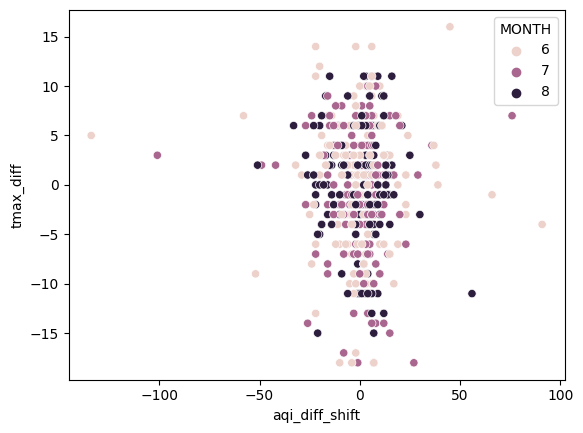

In [124]:
sns.scatterplot(data = summer_merged_df, x = 'aqi_diff_shift', y = 'tmax_diff', hue = 'MONTH')

<Axes: xlabel='tmax_diff', ylabel='aqi_diff_shift'>

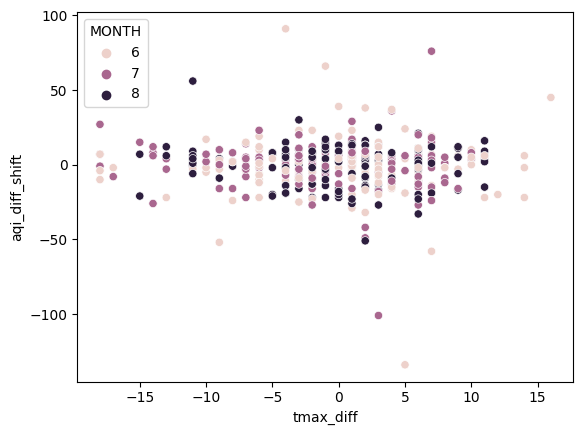

In [127]:
sns.scatterplot(data = summer_merged_df, y = 'aqi_diff_shift', x = 'tmax_diff', hue = 'MONTH')

Mmm, suggestive. Note that August is collected on the low-AQI side. In part that's because this year is the crappiest year in the dataset for AQI. 

Ok. Causality is notoriously difficult, and I'm working with some funky series (in particular, AQI isn't, mmm, exactly stationary???). Can I use Granger causality for an investigative approach? Python strikes again (in crappiness), gotta install statsmodels.

In [105]:
#%pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 20.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.5/29.5 MB 24.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 6.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [106]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

In [128]:
diffed_data = summer_merged_df[['aqi_diff', 'tmax_diff']].dropna()


In [129]:
max_lag = 3  # You can adjust the maximum lag as needed
results = grangercausalitytests(diffed_data, max_lag, verbose=True)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9210  , p=0.1664  , df_denom=460, df_num=1
ssr based chi2 test:   chi2=1.9335  , p=0.1644  , df=1
likelihood ratio test: chi2=1.9295  , p=0.1648  , df=1
parameter F test:         F=1.9210  , p=0.1664  , df_denom=460, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.6381  , p=0.1955  , df_denom=457, df_num=2
ssr based chi2 test:   chi2=3.3120  , p=0.1909  , df=2
likelihood ratio test: chi2=3.3001  , p=0.1920  , df=2
parameter F test:         F=1.6381  , p=0.1955  , df_denom=457, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.9105  , p=0.0342  , df_denom=454, df_num=3
ssr based chi2 test:   chi2=8.8660  , p=0.0311  , df=3
likelihood ratio test: chi2=8.7819  , p=0.0323  , df=3
parameter F test:         F=2.9105  , p=0.0342  , df_denom=454, df_num=3


/opt/homebrew/Cellar/jupyterlab/4.0.2/libexec/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
